# Chapter 3: Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Simple Linear Regression

### Importing the dataset

In [2]:
dataset = pd.read_csv('data/Boston.csv')

In [3]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Fitting the model

In [5]:
import statsmodels.api as sm
simple_linear_regression = sm.OLS(endog=dataset['medv'], exog=sm.tools.add_constant(dataset['lstat'])).fit()

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
simple_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           5.08e-88
Time:                        15:48:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Computing the mean square error of the fitted model
sm.tools.eval_measures.mse(dataset['medv'], simple_linear_regression.predict())

38.48296722989414

### Prediction and Confidence Interval

In [8]:
X_test = sm.tools.add_constant(pd.Series([5, 10, 15]))

In [9]:
simple_linear_regression.predict(exog=X_test)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [10]:
y_pred = np.dot(X_test, simple_linear_regression.params)

In [11]:
y_pred

array([29.80359411, 25.05334734, 20.30310057])

In [12]:
from scipy import stats

In [13]:
#Significance level:
sl = 0.05

In [14]:
# t-statistic for significance level
(t_minus, t_plus) = stats.t.interval(alpha = (1.0 - sl), df = len(simple_linear_regression.resid) - 2)

In [15]:
t_minus, t_plus

(-1.964682003389552, 1.964682003389552)

In [16]:
simple_linear_regression.normalized_cov_params

,const,lstat
const,0.008193,-0.000491
lstat,-0.000491,0.000039


In [17]:
simple_linear_regression.mse_resid

38.63567741731436

In [18]:
# Computing confidence interval concretely
lower_bound = y_pred + t_minus*np.sqrt(simple_linear_regression.mse_resid*(np.sum(np.dot(X_test, simple_linear_regression.normalized_cov_params) * X_test, axis=1)))
upper_bound = y_pred + t_plus*np.sqrt(simple_linear_regression.mse_resid*(np.sum(np.dot(X_test, simple_linear_regression.normalized_cov_params) * X_test, axis=1)))

In [19]:
prediction = {'y_pred': y_pred, 'ci_lower': lower_bound, 'ci_upper': upper_bound}
prediction = pd.DataFrame(prediction)

In [20]:
prediction

,y_pred,ci_lower,ci_upper
0,29.803594,29.007412,30.599776
1,25.053347,24.474132,25.632563
2,20.303101,19.731588,20.874613


In [21]:
# Getting prediction from OLS model
pred = simple_linear_regression.get_prediction(X_test)

In [22]:
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


### Visualization of the result

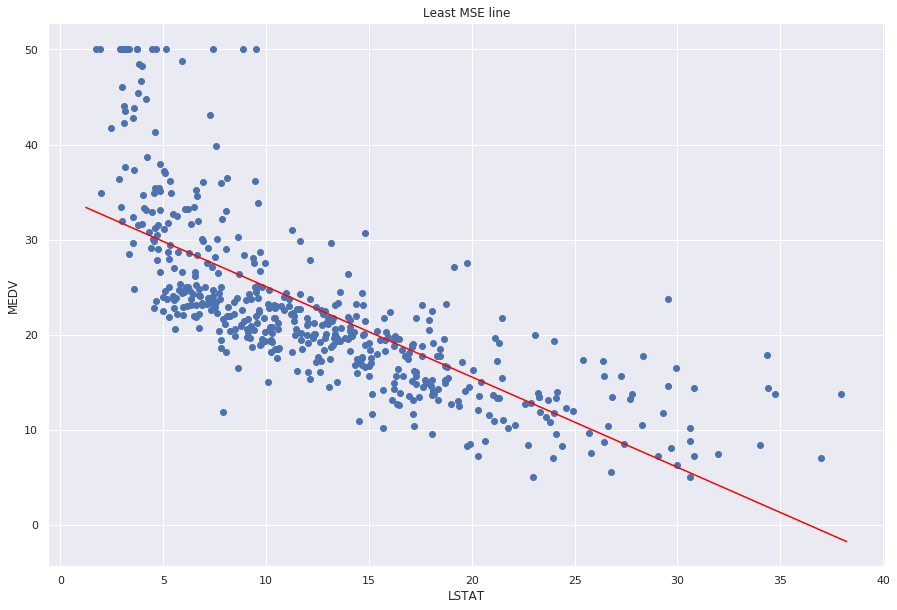

In [23]:
# Visualization of the line fitted the dataset
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(dataset['lstat'].min() - 0.5, dataset['lstat'].max() + 0.5)
ax.plot(x, simple_linear_regression.predict(sm.tools.add_constant(x)), c='red')
ax.scatter(dataset['lstat'], dataset['medv'])
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
ax.set_title('Least MSE line')
plt.show();

In [24]:
# Computing the residuals from the linear regression fit
resid = simple_linear_regression.resid

In [25]:
resid

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64

In [26]:
influence = simple_linear_regression.get_influence()

In [27]:
# Computing studentized residuals
external_studentized_resid = influence.resid_studentized_external
studentized_resid = influence.resid_studentized

In [28]:
external_studentized_resid[-10:]

array([ 0.84321567, -0.45993587, -0.17362845, -0.43581342, -0.66631759,
       -0.47750203, -0.85791477, -0.85338742, -1.03108965, -2.45582479])

In [29]:
# Computing H leverage
leverage = influence.hat_matrix_diag

In [30]:
leverage[-10:]

array([0.00477324, 0.00205758, 0.00197905, 0.00220879, 0.00208548,
       0.00232183, 0.00247204, 0.00388613, 0.00345602, 0.00286095])

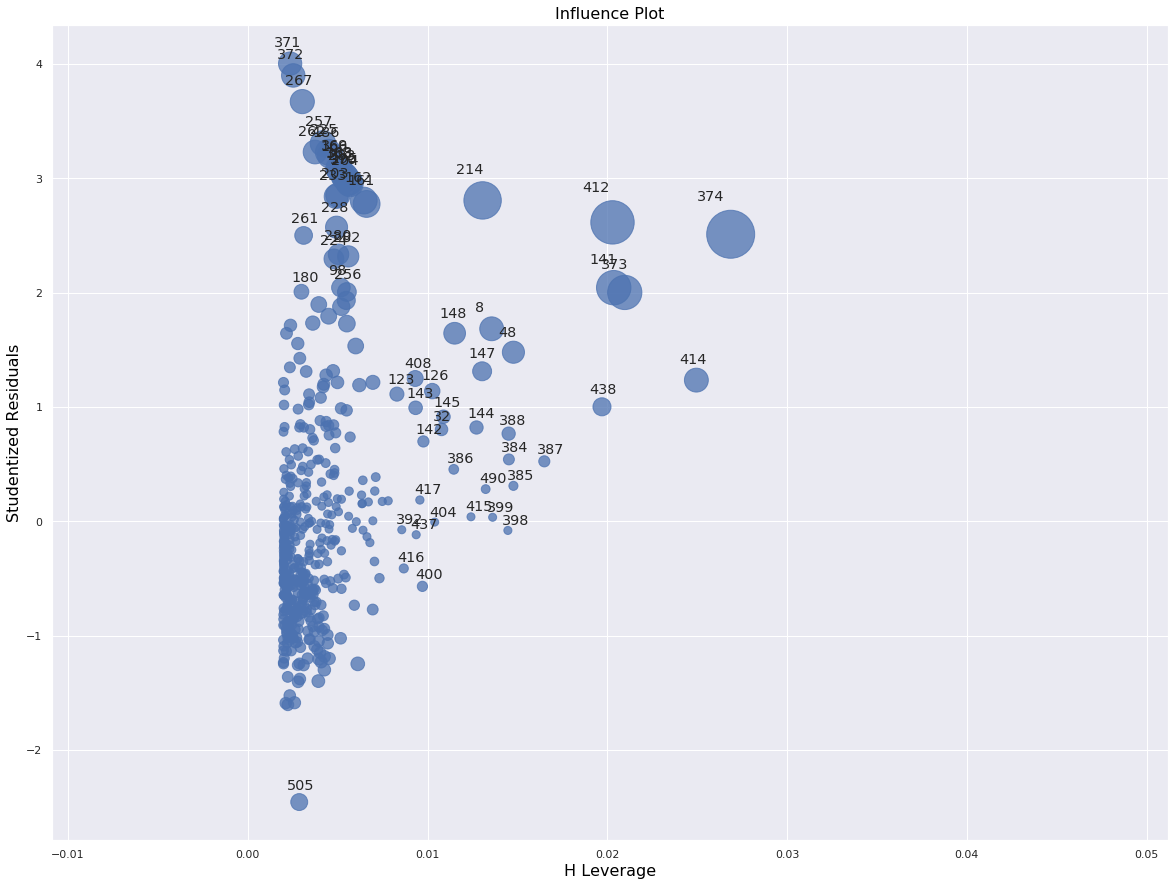

In [31]:
# Influence plots show the (externally) studentized residuals vs. the leverage of each observation
fig, ax = plt.subplots(figsize=(20,15))
fig = sm.graphics.influence_plot(simple_linear_regression, ax=ax, criterion="cooks")

## Multiple Linear Regression

### Fitting the model

In [32]:
multiple_linear_regression = sm.OLS(endog=dataset['medv'], exog=sm.tools.add_constant(dataset.iloc[:, :-1])).fit()

In [33]:
multiple_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          6.72e-135
Time:                        15:48:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assessment of the fitted model

Two of the most common numerical measures of model fit are the RSE and R-squared, the fraction of variance explained.

In [34]:
# Computing R-squared of the model
multiple_linear_regression.rsquared

0.7406426641094095

In [35]:
# Computing Residual standard error concretely
# The sum of squared residuals
rss = np.sum((multiple_linear_regression.resid)**2)
print(rss)

11078.784577954979


In [36]:
# Residual standard error equals to square-root of RSS divided by residual degree of freedom.
# Note that residual degree of freedom = n - p - 1 where p is number of predictors (excluding const).
rse = np.sqrt(rss/multiple_linear_regression.df_resid)
print(rse)

4.745298181699631


In [37]:
# Another way is as follow
np.sqrt(multiple_linear_regression.mse_resid)

4.7452981816996305

Collinearity refers to the situation in which two or more predictor variables are closely related to one another.
A better way to assess multi-collinearity is to compute the Variance Inflation Factor (VIF)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
X = sm.tools.add_constant(dataset.iloc[:, :-1])

In [40]:
X

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [41]:
vif = pd.DataFrame()
vif['Predictor'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [42]:
vif

,Predictor,VIF
0,const,585.265238
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


## Interaction Term

In [43]:
res = sm.OLS.from_formula('medv~lstat*age', data=dataset).fit()

In [44]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           4.86e-88
Time:                        15:48:29   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of the Predictors

In [45]:
res = sm.OLS.from_formula('medv~lstat+np.power(lstat, 2)', data=dataset).fit()

In [46]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          1.56e-112
Time:                        15:48:32   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

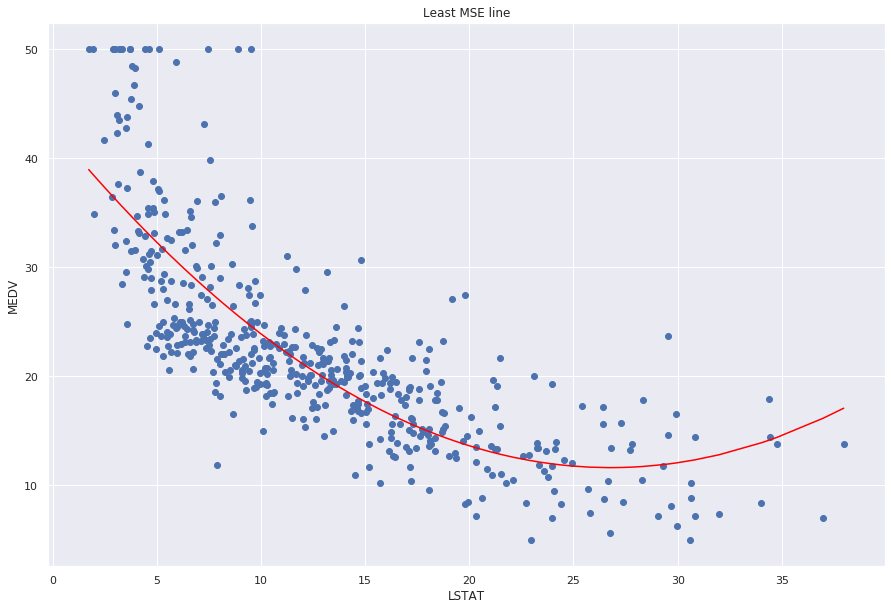

In [47]:
# Visualization of the line fitted the dataset
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(dataset['lstat'].min() - 0.5, dataset['lstat'].max() + 0.5)
ax.plot(dataset['lstat'].sort_values(), res.predict(dataset['lstat'].sort_values()), c='red')
ax.scatter(dataset['lstat'], dataset['medv'])
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')
ax.set_title('Least MSE line')
plt.show();

In [48]:
res = sm.OLS.from_formula('medv~lstat+np.power(lstat, 2)+np.power(lstat, 3)+np.power(lstat, 4)+np.power(lstat, 5)', data=dataset).fit()

In [49]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          8.73e-122
Time:                        15:48:34   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
lstat                -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Qualitative Predictors

In [50]:
dataset2 = pd.read_csv('data/Carseats.csv')

In [51]:
dataset2.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [52]:
# Creating dummies variables
dataset2 = pd.get_dummies(dataset2, drop_first=True)

In [53]:
dataset2

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,9.50,138,73,11,276,120,42,17,0,0,1,1
1,2,11.22,111,48,16,260,83,65,10,1,0,1,1
2,3,10.06,113,35,10,269,80,59,12,0,1,1,1
3,4,7.40,117,100,4,466,97,55,14,0,1,1,1
4,5,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,33,14,1,0,1,1
396,397,6.14,139,23,3,37,120,55,11,0,1,0,1
397,398,7.41,162,26,12,368,159,40,18,0,1,1,1
398,399,5.94,100,79,7,284,95,50,12,0,0,1,1


In [54]:
dataset2['Income:Advertising'] = dataset2['Income'] * dataset2['Advertising']
dataset2['Price:Age'] = dataset2['Price'] * dataset2['Age']

In [55]:
dataset2

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Income:Advertising,Price:Age
0,1,9.50,138,73,11,276,120,42,17,0,0,1,1,803,5040
1,2,11.22,111,48,16,260,83,65,10,1,0,1,1,768,5395
2,3,10.06,113,35,10,269,80,59,12,0,1,1,1,350,4720
3,4,7.40,117,100,4,466,97,55,14,0,1,1,1,400,5335
4,5,4.15,141,64,3,340,128,38,13,0,0,1,0,192,4864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,33,14,1,0,1,1,1836,4224
396,397,6.14,139,23,3,37,120,55,11,0,1,0,1,69,6600
397,398,7.41,162,26,12,368,159,40,18,0,1,1,1,312,6360
398,399,5.94,100,79,7,284,95,50,12,0,0,1,1,553,4750


In [56]:
res = sm.OLS(endog=dataset2['Sales'], exog=sm.tools.add_constant(dataset2.iloc[:, 2:])).fit()

In [57]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 21 Oct 2019   Prob (F-statistic):          6.14e-166
Time:                        15:48:45   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5756      1.009      6.519      0.000       4.592       8.559
CompPrice              0.0929      0.004     22.567      0.000       0.085       0.101
Income                 0.0109      0.003      4.183      0.000       0.006       0.016
Advertising            0.0702      0.023      3.107      0.002       0.026       0.115
Population             0.0002      0.000      0.433      0.665      -0.001       0.001
Price                 -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                   -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education             -0.0209      0.020     -1.063      0.288      -0.059       0.018
ShelveLoc_Good         4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc_Medium       1.9533      0.126     15.531      0.000       1.706       2.201
Urban_Yes              0.1402      0.112      1.247      0.213      -0.081       0.361
US_Yes                -0.1576      0.149     -1.058      0.291      -0.450       0.135
Income:Advertising     0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age              0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""